Code adapted from Zack Fizell

In [57]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

## $m_2a = - \frac{Gm_1m_2}{r^2}$ 
## We can rewrite this as:
## * $\dot{x} = \frac{dx}{dt} = v_x$
## * $\ddot{x} = \frac{d^2x}{dt^2} = \frac{dv_x}{dt} = -\frac{GM_E}{r^{3/2}}x$

In General

## * $\vec{\dot{u}} = \vec{v}$
## * $\vec{\ddot{u}} = -\frac{GM_E}{r^{3/2}}\vec{u}$


## Complete the function below where we will treat state as a vector containing 6 elements:

## $$state = [x,y,z,v_x,v_y,v_z]$$

In [24]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    x_ddot = -(mu)/(r**(3/2))*x
    y_ddot = -(mu)/(r**(3/2))*y
    z_ddot = -(mu)/(r**(3/2))*z
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

## We will look at the orbit of the Internation Space Station. The initial conditons are defined below

In [25]:
# Initial Conditions / ISS
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667

 ### 1. Create an crete an initial state vector called $\it{\mathrm{state\_0}}$ array containing the initial position and veolcity information.
 ### 2. Then define a time array using $\it{\mathrm{linspace}}$ that starts at 0s and covers 21,600s containing 2000 points 
 ### 3. Use Scipy's $\it{\mathrm{integrate.solve\_ivp}}$ to solve the ODEs

In [117]:
state_0 = np.array([X_0,Y_0,Z_0,VX_0,VY_0,VZ_0])
#state_0 = np.array(state_0_iss)
time = np.linspace(0, 21600, 2000)
print(len(time))
t0 = time[0]
tf = time[-1]
sol = integrate.solve_ivp(model_2BP,(t0,tf),state_0, method='RK45',t_eval=time)
#sol.t time index
#sol.y[0] x index
#sol.y[1] y index 
#etc..
x = sol.y[0]
y = sol.y[1]
z = sol.y[2]
t_sat = sol.t

#sol2 = integrate.solve_ivp(model_2BP,(t0,tf),state_0, method='DOP853',t_eval=time)
#sol2

2000


# Analyze the Results

Make plots of X vs. time
1. X vs. time, Y vs, time, Z vs. time
2. X vs. Y, X vs. Z, Y vs. Z


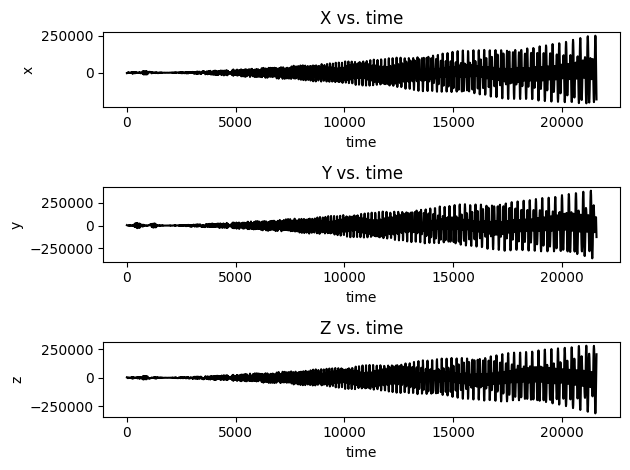

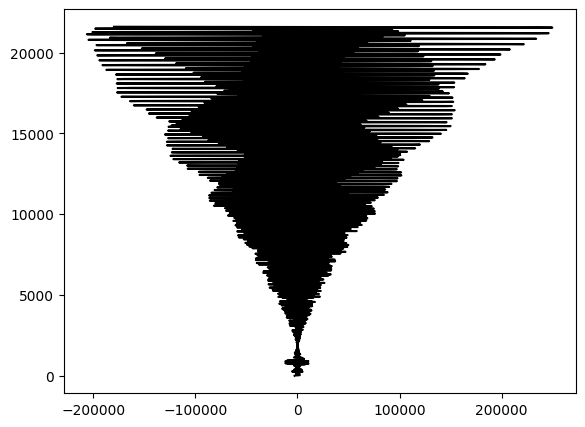

In [123]:
plt.subplot(3,1,1)
plt.plot(t_sat,x,'k')
plt.xlabel('time')
plt.ylabel('x')
plt.title('X vs. time')

plt.subplot(3,1,2)
plt.plot(t_sat,y,'k')
plt.xlabel('time')
plt.ylabel('y')
plt.title('Y vs. time')

plt.subplot(3,1,3)
plt.plot(t_sat,z,'k')
plt.xlabel('time')
plt.ylabel('z')
plt.title('Z vs. time')
plt.subplots_adjust(left=0.1,right=0.5,bottom=0.1,top=0.8)
plt.tight_layout();

fig = plt.figure('x vs time')
axes = fig.add_axes([0.2,0.2,0.8,0.8])
axes.plot(x,t_sat,'k',label=r'$Scipy (RK45)$');


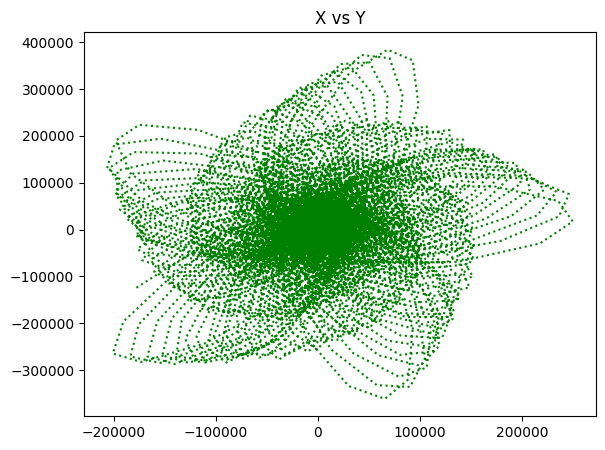

In [132]:
fig = plt.figure('x vs y')
axes = fig.add_axes([0.2,0.2,0.8,0.8])
axes.plot(x,y,':g',label=r'$Scipy (RK45)$')
axes.set_title('X vs Y');

Text(0.5, 1.0, 'X vs Z')

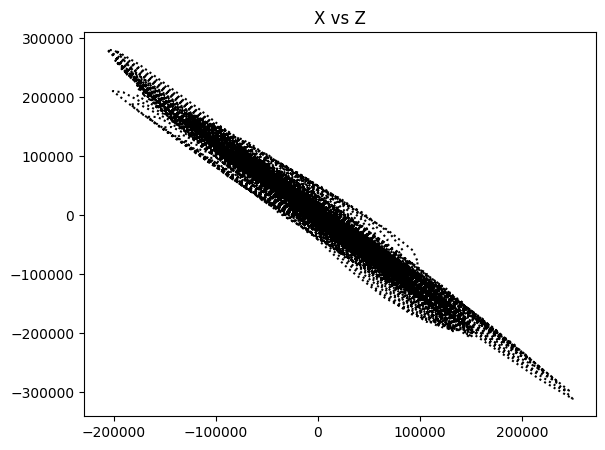

In [130]:
fig = plt.figure('x vs z')
axesz = fig.add_axes([0.2,0.2,0.8,0.8])
axesz.plot(x,z,':k',label=r'$Scipy (RK45)$')
axesz.set_title('X vs Z')

Text(0.5, 1.0, 'Y vs Z')

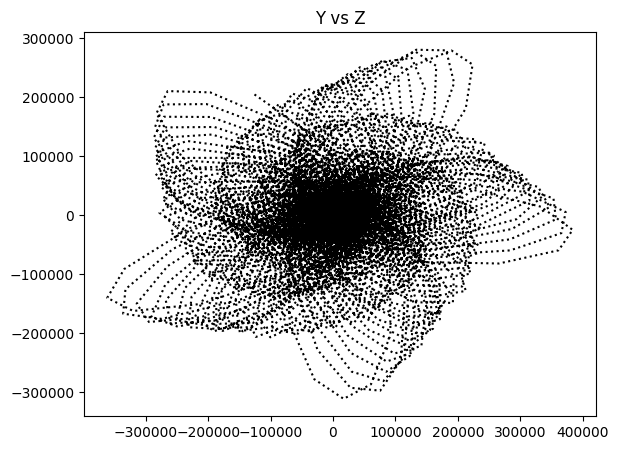

In [131]:
fig = plt.figure('z vs y')
axesz = fig.add_axes([0.2,0.2,0.8,0.8])
axesz.plot(y,z,':k',label=r'$Scipy (RK45)$')
axesz.set_title('Y vs Z')

# 3D Plot

Make a 3D plot showing the 3D trajectory of the ISS


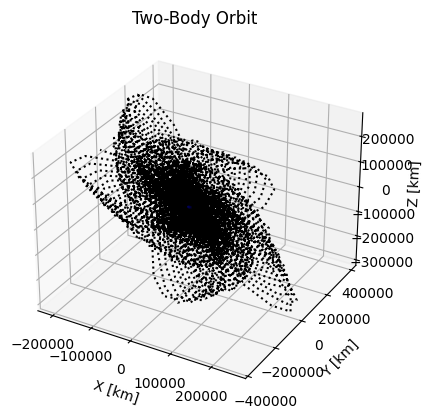

In [142]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(x, y, z, ':k')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');
